In [ ]:
pip install -U fortran-magic


In [ ]:
import py_compile

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/me.jpg?raw=1" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
lis1 = [10, 'sec', 3.4, 4.15, "f", "last"]
lis1

[10, 'sec', 3.4, 4.15, 'f', 'last']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
fi = lis1[0]
mid = lis1[int(len(lis1)/2)]
print("First:", fi)
print("Middle:", mid)

First: 10
Middle: 4.15


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
las = lis1[-1]
fir = lis1[-len(lis1)]
print("Last:", las)
print("First:", fir)

Last: last
First: 10


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
sub = lis1[0:4]
sub

[10, 'sec', 3.4, 4.15]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
threeI = lis1[3:6]
threeI

[4.15, 'f', 'last']

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
threeL = lis1[3:]
threeL

[4.15, 'f', 'last']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
lis2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
lis2[1:8:2]

[2, 4, 6, 8]

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

[5, 4, 3, 2, 1]

In [ ]:
lis2[::-2]

[10, 8, 6, 4, 2]

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
print("Antes:", lis2)
lis2.append('AUC')
print("Despues:", lis2)

Antes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Despues: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'AUC']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [ ]:
[i * 2 for i in lis2]

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 'AUCAUC']

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
tanks = {'Russia': 'KV-2', 'Yankiland': 'M4 Sherman', 'France': 'Renault R35/40'}
tanks

{'France': 'Renault R35/40', 'Russia': 'KV-2', 'Yankiland': 'M4 Sherman'}

In [ ]:
# Like lists, dictionaries are size-mutable.
tanks['Germany'] = 'Tiger'
tanks

{'France': 'Renault R35/40',
 'Germany': 'Tiger',
 'Russia': 'KV-2',
 'Yankiland': 'M4 Sherman'}

In [ ]:
del tanks['Yankiland']
tanks

{'France': 'Renault R35/40', 'Germany': 'Tiger', 'Russia': 'KV-2'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/pacino.gif?raw=1" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
max1 = [[34, 25, 542],
     [21324, -45, 5]]

max2 = [[13, -2, 53, 4],
     [23456, 35, 774, 55],
     [26, 643563, 2345, 2425],]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/gross.gif?raw=1" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 34.6 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [ ]:
%%time
matmul(max1,max2)

CPU times: user 20 µs, sys: 0 ns, total: 20 µs
Wall time: 23.8 µs


[[600934, 348811953, 1292142, 1315861], [-778178, 3173592, 1107067, 94946]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.605995803608815, 0.7463029553199624, 0.4049409896000773],
 [0.929201920776893, 0.9308219935828413, 0.48272007827675456]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 7.02 s, sys: 16.2 ms, total: 7.04 s
Wall time: 7.06 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
lisdat = [float(i) for i in range(5000000)]
myDatLis = np.array(lisdat)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 7.73 ms, sys: 0 ns, total: 7.73 ms
Wall time: 7.67 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 180 µs, sys: 0 ns, total: 180 µs
Wall time: 185 µs


333328333350000.0

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/sloth.gif?raw=1" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/runaway.gif?raw=1" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/thisisfine.gif?raw=1" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
myData = np.array([13, 424, 2, 4])
myData

array([ 13, 424,   2,   4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
myData + myData

array([ 26, 848,   4,   8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()
array_data

CPU times: user 954 µs, sys: 81 µs, total: 1.04 ms
Wall time: 725 µs


In [ ]:
%%time
(myDatLis * myDatLis).sum()
myDatLis

CPU times: user 14.1 ms, sys: 0 ns, total: 14.1 ms
Wall time: 18.2 ms


In [ ]:
%%time
(array_data * array_data).sum()

CPU times: user 1.43 ms, sys: 961 µs, total: 2.39 ms
Wall time: 1.98 ms


333328333350000.0

In [ ]:
%%time
(myDatLis * myDatLis).sum()

CPU times: user 14.4 ms, sys: 0 ns, total: 14.4 ms
Wall time: 16.5 ms


4.166665416666759e+19

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 1.29 ms, total: 1.29 ms
Wall time: 728 µs


333328333350000.0

In [ ]:
%%time
myDatLis.dot(myDatLis)

CPU times: user 5.98 ms, sys: 984 µs, total: 6.96 ms
Wall time: 4.13 ms


4.166665416667174e+19

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 167 µs, sys: 14 µs, total: 181 µs
Wall time: 185 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(myDatLis, myDatLis)

CPU times: user 9.19 ms, sys: 0 ns, total: 9.19 ms
Wall time: 9.27 ms


4.16666541667329e+19

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
import math
myData.appened(math.pi)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [ ]:
newM = data.reshape(2, 2)
newM

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
myData = np.arange(40).reshape(8, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

In [ ]:
myData * myData

array([[   0,    1,    4,    9,   16],
       [  25,   36,   49,   64,   81],
       [ 100,  121,  144,  169,  196],
       [ 225,  256,  289,  324,  361],
       [ 400,  441,  484,  529,  576],
       [ 625,  676,  729,  784,  841],
       [ 900,  961, 1024, 1089, 1156],
       [1225, 1296, 1369, 1444, 1521]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
np.sqrt(myData)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894],
       [4.47213595, 4.58257569, 4.69041576, 4.79583152, 4.89897949],
       [5.        , 5.09901951, 5.19615242, 5.29150262, 5.38516481],
       [5.47722558, 5.56776436, 5.65685425, 5.74456265, 5.83095189],
       [5.91607978, 6.        , 6.08276253, 6.164414  , 6.244998  ]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
(myData % 6) == 5

array([[False, False, False, False, False],
       [ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True],
       [False, False, False, False, False],
       [ True, False, False, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
((myData % 4) == 2) | ((myData % 7) == 0)

array([[ True, False,  True, False, False],
       [False,  True,  True, False, False],
       [ True, False, False, False,  True],
       [False, False, False,  True, False],
       [False,  True,  True, False, False],
       [False,  True, False,  True, False],
       [ True, False, False, False,  True],
       [ True, False, False,  True, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [ ]:
myData @ myData.T

array([[  30,   80,  130,  180,  230,  280,  330,  380],
       [  80,  255,  430,  605,  780,  955, 1130, 1305],
       [ 130,  430,  730, 1030, 1330, 1630, 1930, 2230],
       [ 180,  605, 1030, 1455, 1880, 2305, 2730, 3155],
       [ 230,  780, 1330, 1880, 2430, 2980, 3530, 4080],
       [ 280,  955, 1630, 2305, 2980, 3655, 4330, 5005],
       [ 330, 1130, 1930, 2730, 3530, 4330, 5130, 5930],
       [ 380, 1305, 2230, 3155, 4080, 5005, 5930, 6855]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:

tan = np.tan(np.linspace(0, math.pi/2, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
tan[0]

0.0

In [ ]:
sines[:3]  # First three elements  

In [ ]:
tan[:5]

array([0.        , 0.17632698, 0.36397023, 0.57735027, 0.83909963])

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
tan[6:]

array([1.73205081e+00, 2.74747742e+00, 5.67128182e+00, 1.63312394e+16])

In [ ]:
sines[::2]  # Every other element.

In [ ]:
tan[::-1]

array([1.63312394e+16, 5.67128182e+00, 2.74747742e+00, 1.73205081e+00,
       1.19175359e+00, 8.39099631e-01, 5.77350269e-01, 3.63970234e-01,
       1.76326981e-01, 0.00000000e+00])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
print("Tnans:\n", sines)
print("Tans < sin:\n", tan != sines)
print("Tans[sines >= tan]:\n", tan[sines >= tan])

Tnans:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
Tans < sin:
 [False  True  True  True  True  True  True  True  True  True]
Tans[sines >= tan]:
 [0.         0.17632698 0.36397023 0.57735027 0.83909963]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
print(tan)
tan[[0, 1, 3, 2, 9, 5]]

[0.00000000e+00 1.76326981e-01 3.63970234e-01 5.77350269e-01
 8.39099631e-01 1.19175359e+00 1.73205081e+00 2.74747742e+00
 5.67128182e+00 1.63312394e+16]


array([0.00000000e+00, 1.76326981e-01, 5.77350269e-01, 3.63970234e-01,
       1.63312394e+16, 1.19175359e+00])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
unSor = np.array([4, 6, -2, 4535, -345, 533, 242])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
sortIn = np.argsort(unSor)
sortIn

array([4, 2, 0, 1, 6, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
unSor[sortIn]

array([-345,   -2,    4,    6,  242,  533, 4535])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
cps = np.array([3, 7, 8, 8, 7])  
asts = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
capSort = np.argsort(cps)
asts[capSort]

array(['A', 'B', 'E', 'C', 'D'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
dat3 = np.arange(100).reshape(5, 20)
dat3

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
dat3[:2,:10]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
dat3[:3,[5, -2]]

array([[ 5, 18],
       [25, 38],
       [45, 58]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

In [ ]:
dat3[(dat3[:, 0] % 7) == 1]

array([], shape=(0, 20), dtype=int64)

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.110554165877505

In [ ]:
variance(np.random.standard_normal(10))

1.600737427582952

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

In [ ]:
dat1 = np.arange(101)
dat1.mean()

50.0

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
dat1 = np.arange(100).reshape(5, 20)
dat1

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99]])

In [ ]:
data.mean()

14.5

In [ ]:
dat1.mean()

49.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
dat1.mean(axis=0)

array([40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [ ]:
dat1.mean(axis=1)

array([ 9.5, 29.5, 49.5, 69.5, 89.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
r = np.array([-1, 0, 1, 666, 1991])
col = np.array([[-4], [2], [0]])
print("Row:\n", r, sep='')
print("Column:\n", col, sep='')

Row:
[  -1    0    1  666 1991]
Column:
[[-4]
 [ 2]
 [ 0]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [ ]:
r + col

array([[  -5,   -4,   -3,  662, 1987],
       [   1,    2,    3,  668, 1993],
       [  -1,    0,    1,  666, 1991]])

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/broadcasting.png?raw=1" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [ ]:
print("Data:\n", dat1, sep='')
print("Mean:\n", dat1.mean(axis=0), sep='')
print("Data - Mean:\n", dat1 - dat1.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]
Mean:
[40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57.
 58. 59.]
Data - Mean:
[[-40. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40.
  -40. -40. -40. -40. -40. -40.]
 [-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.
  -20. -20. -20. -20. -20. -20.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
   20.  20.  20.  20.  20.  20.]
 [ 40.  40.  40.  40.  40.  40.  40.  40.  40.  40.  40.  40.  40.  40.
   40.  40.  40.  40.  40.  40.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/unicorn.jpg?raw=1" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/panda-wrangling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/pandas_logo.png?raw=1" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
pan = pd.Series(index=[1, 2, 3, 4, 5], data=['AUC', 'AUV', 'PXL', 'PTO', 'IHY'])
pan

1    AUC
2    AUV
3    PXL
4    PTO
5    IHY
dtype: object

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
print("Index:", pan.index)
print("Values", pan.values)

Index: Int64Index([1, 2, 3, 4, 5], dtype='int64')
Values ['AUC' 'AUV' 'PXL' 'PTO' 'IHY']


In [ ]:
"# We can look up values out of a Series by position...
s.iloc[0]

SyntaxError: ignored

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
pan.loc[1]

'AUC'

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
pan.iloc[0:3]

1    AUC
2    AUV
3    PXL
dtype: object

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
pan.loc[:4]

1    AUC
2    AUV
3    PXL
4    PTO
dtype: object

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
pan.iloc[[0, int(len(pan)/2)]]

1    AUC
3    PXL
dtype: object

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
pan.loc[pan != 'AUC']

2    AUV
3    PXL
4    PTO
5    IHY
dtype: object

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
othPan = pd.Series({6: 'PP'})
othPan

6    PP
dtype: object

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
pan + othPan

1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
dtype: object

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
(pan + othPan).fillna(6.66)

1    6.66
2    6.66
3    6.66
4    6.66
5    6.66
6    6.66
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
calf = pd.read_csv('sample_data/california_housing_test.csv', parse_dates=['longitude'], index_col='longitude')
calf.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,,,,,,,,
-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
calf.iloc[:3, :2]

,latitude,housing_median_age
longitude,,
-122.05,37.37,27.0
-118.30,34.26,43.0
-117.81,33.78,27.0


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [ ]:
calf.loc[-123: -100,['latitude']]

KeyError: ignored

# Rolling Operations

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/rolling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

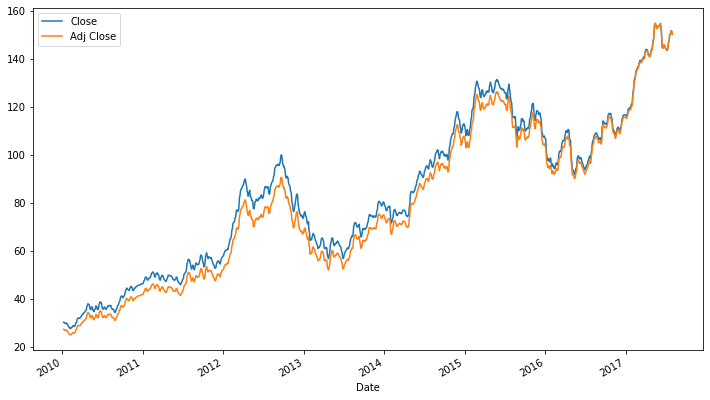

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

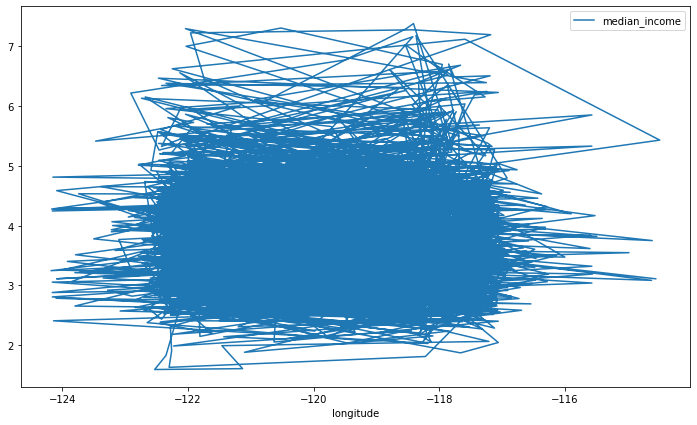

In [ ]:
calf.rolling(5)[['median_income']].mean().plot();

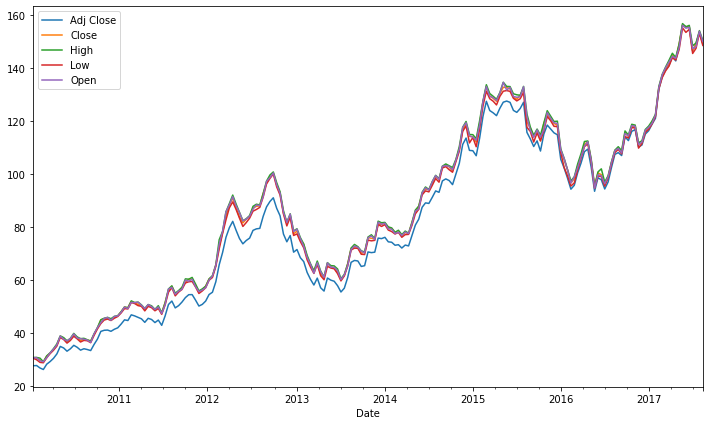

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

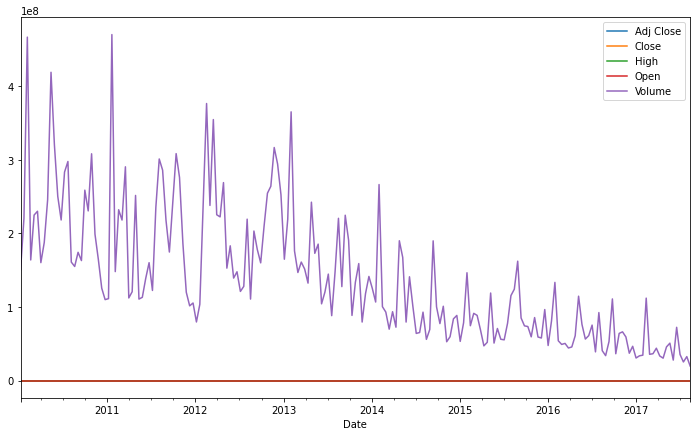

In [ ]:
aapl.drop('Low', axis=1).resample('2W').max().plot();

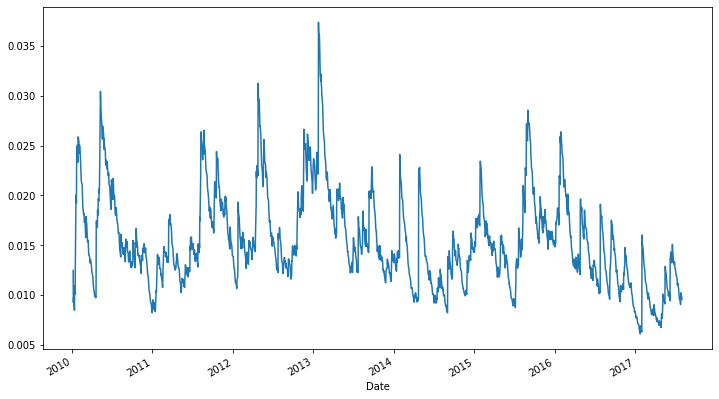

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

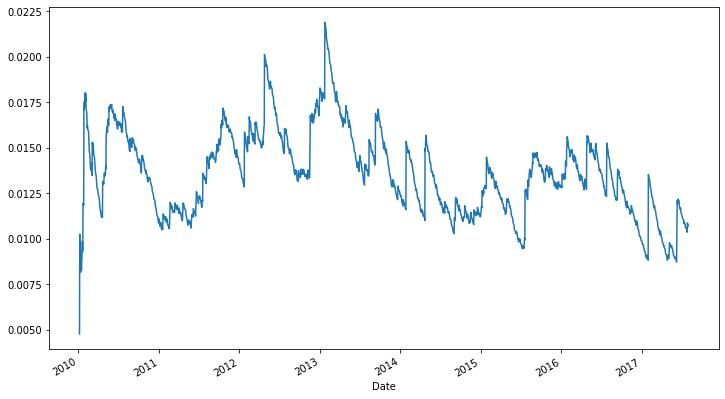

In [ ]:
aapl['High'].pct_change().ewm(span=100).std().plot();

# "Real World" Data

In [ ]:
from avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!